<a href="https://colab.research.google.com/github/asurovi/Mathematical-Numerical-Bayesian-and-Causal-Problem-Solving/blob/main/Hackathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon 1
**Group Members:**

Agnila Ghosh Surovi,

William Mason Werner,

Pablo Ruiz


**Date :** 2/6/2026

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


# Q-2: Root-Finding in Nonlinear Constitutive Models

**Problem description:**

A nonlinear stress–strain relation is given implicitly:

$\sigma = E\epsilon + \alpha \cdot \epsilon ^ 3$

where $\sigma$ is the stress, $\epsilon$ is the strain, $E$ is the Young’s modulus (doimnate at small strain), and $\alpha$ is cubic nonlinear term (leading-order elastic nonlinearity).

For typical soft polymers, $E$ $\approx 10^4$ to $10 ^7$ Pa, and $\alpha$ $\approx 10^6$ to $10^8$ Pa

**Tasks:**

1. Given stress values $\sigma$, solve for strain $\epsilon$.
2. Compare Newton, bisection, and secant methods.
3. Identify regimes where Newton fails.




## Answer 2:

Here,

$f (\epsilon)= E \epsilon + \alpha\, \cdot\, \epsilon^{3} - \sigma = 0$

$f'(\epsilon) = E + 3\, \alpha\,\cdot\,\epsilon^{2}$

* Newton Method:

  $\epsilon_{n+1} = \epsilon_{n} - \frac{f(\epsilon_{n})}{f'(\epsilon_{n})} = \epsilon_{n} - \frac{E \epsilon_n + \alpha\, \cdot\, \epsilon_n^{3} - \sigma}{E + 3\, \alpha\,\cdot\,\epsilon_n^{2}}$


* Bisection Method:

  If $f(a)\,f(b) < 0$, the root estimate is the midpoint $\epsilon = \frac{a+b}{2}$

* Secant Method:

  $\epsilon_{n+1} = \epsilon_{n} - f(\epsilon_{n})\frac{\epsilon_n - \epsilon_{n-1}}{f(\epsilon_{n}) - f(\epsilon_{n-1})}$

In [ ]:
# Since we need f(x) = 0

def func(eps, E, alpha, sigma):
  return E * eps + alpha * eps**3 - sigma

def dfunc(eps, E, alpha):
  return E + 3.0 * alpha * eps**2


In [ ]:
# Newton Method

last_newton_iterations = 0
newton_verbose = False

def newton_method(
    f,                    # The function whose root we are trying to find
    df,                   # The derivative of the function
    x0,                   # The initial guess
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Maximum number of iterations
    ):

    xprev = xnew = x0

    global last_newton_iterations
    last_newton_iterations = 0

    if newton_verbose:
        print("Iteration: {0:5}, x = {1:20.15f}, f(x) = {2:10.15f}".format(last_newton_iterations, x0, f(x0)))

    for i in range(max_iterations):
        last_newton_iterations += 1

        xprev = xnew
        fval  = f(xprev)                       # The current function value
        dfval = df(xprev)                      # The current function derivative value

        if abs(fval) < tolerance:
          return xprev
        if abs(dfval) < 1e-20:
          print("Newton failed: derivative too small")
          return xprev
        else:
          xnew = xprev - fval / dfval            # The next iteration

        if newton_verbose:
            print("Iteration: {0:5}, x = {1:20.15f}, f(x) = {2:10.15f}".format(last_newton_iterations, xnew, f(xnew)))

        if abs(f(xnew)) < tolerance:
            return xnew
        if (abs(xnew-xprev) < tolerance):
            return xnew


    print("Newton-Raphson method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew-xprev))

    return xnew

In [ ]:
# Bisection Method

last_bisection_iterations = 0  # Count how many interactions it took
bisection_verbose = True

def bisection_method(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    ):
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary
    if (fa * fb > 0.):
        return None                     # Bisection method is not applicable

    global last_bisection_iterations
    last_bisection_iterations = 0

    while (abs(b-a) > tolerance):
        last_bisection_iterations += 1
        c = (a + b) / 2.                # Take the midpoint
        fc = f(c)                       # Calculate the function at midpoint

        if abs(fc) < tolerance:
            return c

        if bisection_verbose:
            print("Iteration: {0:5}, c = {1:20.15f}, f(c) = {2:10.15f}".format(last_bisection_iterations, c, fc))

        if (fc * fa < 0.):
            b = c                       # The midpoint is the new right boundary
            fb = fc
        else:
            a = c                       # The midpoint is the new left boundary
            fa = fc

    return (a+b) / 2.

In [ ]:
# Secant Method

last_secant_iterations = 0
secant_verbose = True

def secant_method(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Maximum number of iterations
    ):
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary

    xprev = xnew = a                           # Estimate of the solution from the previous step

    global last_secant_iterations
    last_secant_iterations = 0

    for i in range(max_iterations):
        last_secant_iterations += 1

        if abs(fb - fa) < 1e-20:
          print("Secant failed: slope too small")
          return a

        xprev = xnew
        xnew = a - fa * (b - a) / (fb - fa) # Take the point where straight line between a and b crosses y = 0
        fnew = f(xnew)                      # Calculate the function at midpoint

        if abs(fnew) < tolerance:
            return xnew

        if secant_verbose:
            print("Iteration: {0:5}, x = {1:20.15f}, f(x) = {2:10.15f}".format(last_secant_iterations, xnew, fnew))

        b = a
        fb = fa
        a = xnew
        fa = fnew

        if (abs(xnew-xprev) < tolerance):
            return xnew

    print("Secant method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew - xprev))

    return xnew

In [ ]:
#---------- build 1-variable f(eps), df(eps) ----------
def make_f_df(E, alpha, sigma):
    f  = lambda eps: func(eps, E, alpha, sigma)
    df = lambda eps: dfunc(eps, E, alpha)
    return f, df

# ---------- helper: bracket for bisection/secant----------
def bracket_root(E, alpha, sigma, max_expand=200):
    if sigma == 0.0:
        return 0.0, 0.0

    # two scales: linear + cubic
    eps_lin = sigma / E
    eps_cub = np.sign(sigma) * (abs(sigma) / alpha) ** (1.0 / 3.0)
    scale = max(1e-16, abs(eps_lin), abs(eps_cub))

    if sigma > 0:
        a, b = 0.0, 2.0 * scale
    else:
        a, b = -2.0 * scale, 0.0

    f = lambda eps: func(eps, E, alpha, sigma)
    fa, fb = f(a), f(b)

    for _ in range(max_expand):
        if fa * fb < 0.0:
            return a, b
        # expand outward
        if sigma > 0:
            b *= 2.0
            fb = f(b)
        else:
            a *= 2.0
            fa = f(a)

    raise RuntimeError("Failed to bracket a root (unexpected for alpha>0).")

def solve_one_case(E, alpha, sigma, tol=1e-10):
    f, df = make_f_df(E, alpha, sigma)

    # Newton initial guess
    x0 = sigma / E

    epsN = newton_method(f, df, x0, tolerance=tol)
    itN = last_newton_iterations

    a, b = bracket_root(E, alpha, sigma)
    epsB = bisection_method(f, a, b, tolerance=tol)
    itB = last_bisection_iterations

    epsS = secant_method(f, a, b, tolerance=tol)
    itS = last_secant_iterations

    return (epsN, itN), (epsS, itS), (epsB, itB)

In [ ]:
newton_verbose = False
bisection_verbose = False
secant_verbose = False

E = 1e6
alpha = 1e8
sigmas = [1e3, 1e4, 1e5, 5e5]

print("sigma(Pa) | Newton eps (iters)        | Secant eps (iters)        | Bisection eps (iters)")
print("-"*95)
for sigma in sigmas:
    (eN, iN), (eS, iS), (eB, iB) = solve_one_case(E, alpha, sigma, tol=1e-10)
    print(f"{sigma:8.2e} | {eN: .12e} ({iN:3d}) | {eS: .12e} ({iS:3d}) | {eB: .12e} ({iB:3d})")

# ---------- sweep the full ranges of E and alpha ----------
E_vals = np.logspace(4, 7, 7)       # 1e4 ... 1e7
alpha_vals = np.logspace(6, 8, 5)   # 1e6 ... 1e8
sigmas_sweep = [1e4, 1e5]           # pick the stresses you want

results = []
for sigma in sigmas_sweep:
    for E in E_vals:
        for alpha in alpha_vals:
            (eN, iN), (eS, iS), (eB, iB) = solve_one_case(E, alpha, sigma, tol=1e-10)
            results.append((sigma, E, alpha, eN, iN, eS, iS, eB, iB))

print(f"\nSweep done: {len(results)} cases computed.")
print("sigma | E | alpha | eps(Newton) itN | eps(Secant) itS | eps(Bisection) itB")
print("-"*90)

for row in results[:5]:
    sigma, E, alpha, eN, iN, eS, iS, eB, iB = row
    print(f"{sigma:.2e} | {E:.2e} | {alpha:.2e} | "
          f"{eN:.6f} ({iN}) | {eS:.6f} ({iS}) | {eB:.6f} ({iB})")

sigma(Pa) | Newton eps (iters)        | Secant eps (iters)        | Bisection eps (iters)
-----------------------------------------------------------------------------------------------
1.00e+03 |  9.999000299880e-04 (  2) |  9.999000299880e-04 (  4) |  9.999000253507e-04 ( 29)
1.00e+04 |  9.902885240546e-03 (  3) |  9.902885240546e-03 (  6) |  9.902885231747e-03 ( 30)
1.00e+05 |  6.823278038280e-02 (  5) |  6.823278038280e-02 (  9) |  6.823278036900e-02 ( 31)
5.00e+05 |  1.515980227693e-01 (  8) |  1.515980227693e-01 ( 15) |  1.515980227559e-01 ( 34)
Secant method failed to converge to a required precision in 100 iterations
The error estimate is  0.0009541149246782982
Secant method failed to converge to a required precision in 100 iterations
The error estimate is  0.00013056120406709
Secant method failed to converge to a required precision in 100 iterations
The error estimate is  3.421947144516659e-05
Secant method failed to converge to a required precision in 100 iterations
The error

### Summary:

1. The nonlinear stress-strain equation is solved using Newton, bisection and secant methods. All methods converged to the same strain value for each stress level.

2. Newton required the fewest iterations due to quadratic convergence, while bisection required the most iterations due to linear convergence. The secant method showed intermediate performance and occasionally failed to reach the tolerance within the iteration limit.

3. For the parameter range considered $(E>0), (\alpha>0)$, the derivative $f'(\epsilon)=E+3\alpha\epsilon^2$ is always positive, so the function is monotone and the solution is unique. Therefore, Newton’s method is stable in this regime and does not exhibit failure unless numerical issues arise. Newton failure would occur mainly in softening cases $(\alpha<0)$, where multiple roots and zero-derivative points can exist.



# Q-3: Reconstructing a Potential Energy Surface


**Problem description:**

You are given noisy force measurements $F(x)$ sampled sparsely.

**Tasks:**

1. Interpolate F(x).
2. Reconstruct the potential V(x) via numerical integration.
3. Identify equilibrium points and classify stability.
4. Make it by two methods
4. Estimate error vs. ground truth
5. Estimate how error behaves with number of intervals for different methods




In [ ]:
# Measured x-array

x = np.array([0.99198791, 1.03401624, 1.09777243, 1.16903863, 1.22400793,
       1.30874129, 1.37720132, 1.58423325, 1.64450453, 1.67796538,
       1.67867585, 1.82164472, 1.83116982, 1.84581047, 1.88011411,
       1.8860672 , 2.06462805, 2.22649524, 2.25211675, 2.3344028 ,
       2.36447286, 2.46400053, 2.49198425, 2.49839337, 2.5253077 ,
       2.53460534, 2.55073504, 2.62779939, 2.63802546, 2.70305563,
       2.77555435, 2.84620648, 2.93177044, 2.93846585, 2.94880694])

In [ ]:
# Measured force F(x) with noise added

F = np.array([ 3.49692254e+01,  1.18111393e+01,  1.50752617e+00, -1.47634913e+00,
       -2.69134185e+00, -2.54902098e+00, -2.01257802e+00, -7.32708550e-01,
       -6.94759800e-01, -5.97166382e-01, -6.07822394e-01, -4.05705968e-01,
       -3.44239516e-01, -3.57547192e-01, -2.79683457e-01, -2.86210590e-01,
       -1.65878492e-01, -6.50283631e-02, -7.54397513e-02, -5.71115351e-02,
       -5.05335052e-02, -4.08252108e-02, -5.37775421e-02, -3.29453491e-02,
       -4.41318999e-02, -2.53150113e-02, -3.17176381e-02, -2.84810754e-02,
       -3.01711702e-02, -2.61077932e-02, -2.20682730e-02, -1.47373570e-02,
       -1.17158054e-02, -1.50154447e-02, -1.18781079e-02])

Text(0, 0.5, 'F(x)')

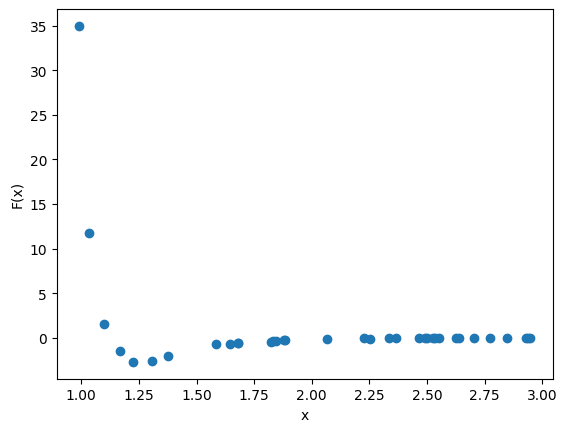

In [ ]:
# Visualization

plt.plot(x, F, "o")
plt.xlabel("x")
plt.ylabel("F(x)")

## Ground-truth for benchmarking and validation

In [ ]:
import numpy as np

# ----------------------------
# Lennard–Jones potential + force (ground truth)
# ----------------------------
def lj_potential(r, epsilon=1.0, sigma=1.0):
    """
    V(r) = 4ε[(σ/r)^12 - (σ/r)^6]
    r must be > 0.
    """
    sr6 = (sigma / r) ** 6
    return 4.0 * epsilon * (sr6**2 - sr6)

def lj_force(r, epsilon=1.0, sigma=1.0):
    """
    Force is negative derivative of potential:
      F(r) = -dV/dr = 24ε/r [2(σ/r)^12 - (σ/r)^6]
    Convention: positive F means repulsive (pushing outward).
    """
    sr6 = (sigma / r) ** 6
    sr12 = sr6**2
    return 24.0 * epsilon / r * (2.0 * sr12 - sr6)

# ----------------------------
# Sampling with LogNormal noise
# ----------------------------
def sample_noisy_lj_force(
    n=35,
    r_min=0.9, r_max=3.0,
    epsilon=1.0, sigma=1.0,
    sigma_ln=0.15,
    seed=0
):
    """
    Sample n separations r uniformly in [r_min, r_max].
    Compute ground truth V(r), F(r).
    Add multiplicative LogNormal noise to |F| while preserving sign:
        F_meas = sign(F_true) * |F_true| * LogNormal(0, sigma_ln)

    This avoids sign flips caused by multiplicative noise near zero.
    """
    rng = np.random.default_rng(seed)

    r = rng.uniform(r_min, r_max, size=n)
    r.sort()

    V_true = lj_potential(r, epsilon=epsilon, sigma=sigma)
    F_true = lj_force(r, epsilon=epsilon, sigma=sigma)

    # multiplicative noise factor (median 1)
    noise_factor = rng.lognormal(mean=0.0, sigma=sigma_ln, size=n)

    # apply to magnitude, keep sign
    F_meas = np.sign(F_true) * (np.abs(F_true) * noise_factor)

    return r, V_true, F_true, F_meas

# ----------------------------
# Optional: dense ground-truth curve for plotting / grading
# ----------------------------
def dense_ground_truth(
    r_min=0.9, r_max=3.0, num=800,
    epsilon=1.0, sigma=1.0
):
    r = np.linspace(r_min, r_max, num=num)
    V = lj_potential(r, epsilon=epsilon, sigma=sigma)
    F = lj_force(r, epsilon=epsilon, sigma=sigma)
    return r, V, F

# Example usage:
if __name__ == "__main__":
    eps, sig = 1.0, 1.0
    r_s, V_s, F_true_s, F_meas_s = sample_noisy_lj_force(
        n=35, r_min=0.9, r_max=3.0,
        epsilon=eps, sigma=sig,
        sigma_ln=0.20, seed=42
    )

    print("First 5 sparse samples:")
    for i in range(5):
        print(f"r={r_s[i]:.4f}  V_true={V_s[i]: .5f}  F_true={F_true_s[i]: .5f}  F_meas={F_meas_s[i]: .5f}")

    # Dense ground truth arrays (for plotting / reference)
    r_dense, V_dense, F_dense = dense_ground_truth(
        r_min=0.9, r_max=3.0, num=800,
        epsilon=eps, sigma=sig
    )


First 5 sparse samples:
r=0.9920  V_true= 0.20758  F_true= 27.90132  F_meas= 34.96923
r=1.0340  V_true=-0.59511  F_true= 12.08340  F_meas= 11.81114
r=1.0978  V_true=-0.97962  F_true= 1.78336  F_meas= 1.50753
r=1.1690  V_true=-0.95314  F_true=-1.74102  F_meas=-1.47635
r=1.2240  V_true=-0.83576  F_true=-2.36297  F_meas=-2.69134


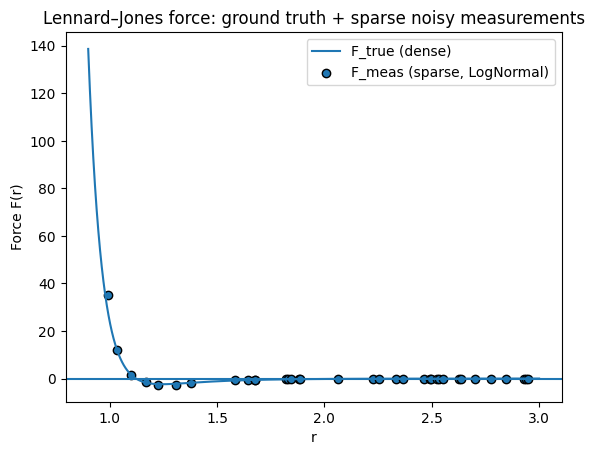

In [ ]:
import matplotlib.pyplot as plt

eps, sig = 1.0, 1.0
r_s, V_s, F_true_s, F_meas_s = sample_noisy_lj_force(
    n=35, r_min=0.9, r_max=3.0,
    epsilon=eps, sigma=sig,
    sigma_ln=0.20, seed=42
)
r_dense, V_dense, F_dense = dense_ground_truth(
    r_min=0.9, r_max=3.0, num=800,
    epsilon=eps, sigma=sig
)

plt.figure()
plt.plot(r_dense, F_dense, label="F_true (dense)")
plt.scatter(r_s, F_meas_s, label="F_meas (sparse, LogNormal)", edgecolors="k")
plt.axhline(0.0)
plt.xlabel("r")
plt.ylabel("Force F(r)")
plt.legend()
plt.title("Lennard–Jones force: ground truth + sparse noisy measurements")
plt.show()


## Answer 3:

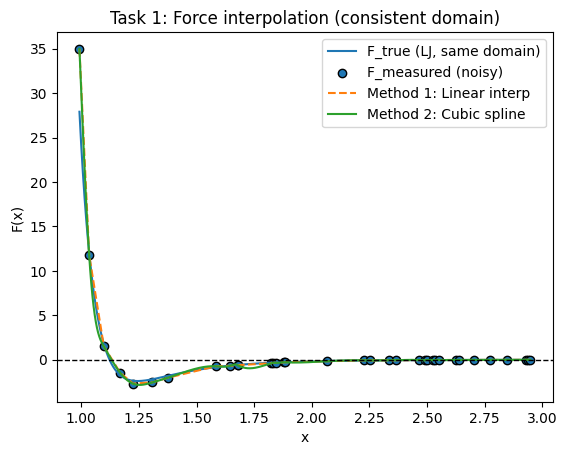

In [ ]:
# ---- Sort measured data (required) ----
idx = np.argsort(x)
x_sorted = x[idx]
F_sorted = F[idx]

# ---- Define a common dense grid ONLY over measured domain ----
xmin, xmax = x_sorted.min(), x_sorted.max()
x_dense = np.linspace(xmin, xmax, 800)

# ---- Ground truth on the SAME grid (for later error + plotting) ----
F_true_dense = lj_force(x_dense)
V_true_dense = lj_potential(x_dense)

# ---- Method 1: Linear interpolation ----
F_lin_dense = np.interp(x_dense, x_sorted, F_sorted)

# ---- Method 2: Cubic spline interpolation ----
F_spline_fun = CubicSpline(x_sorted, F_sorted, bc_type="natural")  # no extrapolation
F_spline_dense = F_spline_fun(x_dense)

# ---- Plot: Interpolated forces + measured points + ground truth ----
plt.figure()
plt.plot(x_dense, F_true_dense, label="F_true (LJ, same domain)")
plt.scatter(x_sorted, F_sorted, label="F_measured (noisy)", edgecolors="k")
plt.plot(x_dense, F_lin_dense, "--", label="Method 1: Linear interp")
plt.plot(x_dense, F_spline_dense, "-", label="Method 2: Cubic spline")
plt.axhline(0.0, color="black", linestyle="--", linewidth=1)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Task 1: Force interpolation (consistent domain)")
plt.legend()
plt.show()

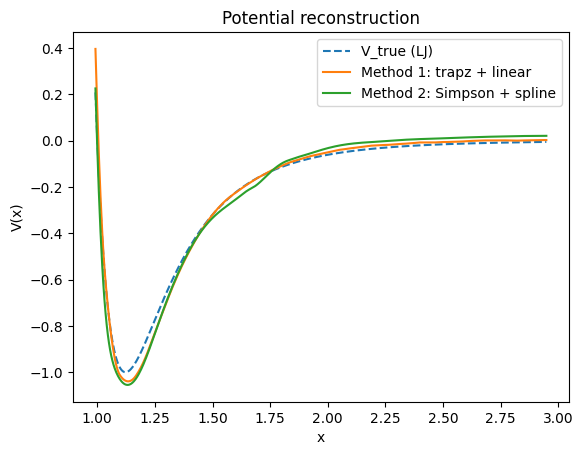

In [ ]:
# Simpson's rule
def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")

    h = (b - a) / n
    ret = f(a) + f(b)

    for k in range(1, n, 2):
        ret += 4 * f(a + k * h)

    for k in range(2, n-1, 2):
        ret += 2 * f(a + k * h)

    ret *= h / 3.0
    return ret


# Trapezoidal rule
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a
    fk = f(xk)

    for k in range(n):
        xk += h
        fk1 = f(xk)
        ret += h * (fk + fk1) / 2.0
        fk = fk1

    return ret

# reference point
x0 = x_sorted.min()

# number of integration intervals
N = 200

# Method 1: linear interpolation force function
F_linear_fun = lambda z: np.interp(z, x_sorted, F_sorted)

# Method 2: spline force function
F_spline_fun = CubicSpline(x_sorted, F_sorted, bc_type="natural")

V_trap = []
V_simp = []

for xi in x_dense:
    V_trap.append(-trapezoidal_rule(F_linear_fun, x0, xi, N))

    if N % 2 == 1:
        N += 1
    V_simp.append(-simpson_rule(F_spline_fun, x0, xi, N))

V_trap = np.array(V_trap)
V_simp = np.array(V_simp)

# align constant with LJ potential
V_true_dense = lj_potential(x_dense)

V_trap += np.mean(V_true_dense - V_trap)
V_simp += np.mean(V_true_dense - V_simp)



plt.figure()
plt.plot(x_dense, V_true_dense, "--", label="V_true (LJ)")
plt.plot(x_dense, V_trap, label="Method 1: trapz + linear")
plt.plot(x_dense, V_simp, label="Method 2: Simpson + spline")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.legend()
plt.title("Potential reconstruction")
plt.show()


Equilibrium is where F(x) = 0


Method 1 (linear interp) equilibria:
  x* = 1.13377784   dF/dx = -4.187e+01   -> stable

Method 2 (cubic spline) equilibria:
  x* = 1.13130210   dF/dx = -4.353e+01   -> stable

Ground-truth (LJ) equilibrium = 1.1224620483093293


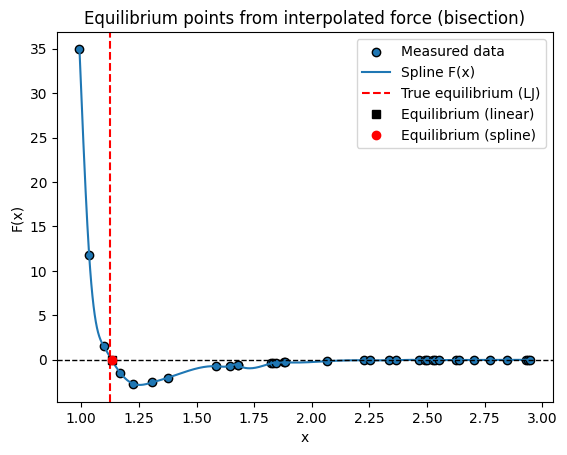

In [ ]:
idx = np.argsort(x)
x_sorted = x[idx]
F_sorted = F[idx]
xmin, xmax = x_sorted.min(), x_sorted.max()

# ----------------------------
# Two interpolants for F(x)
# ----------------------------
F_lin_fun = lambda z: np.interp(z, x_sorted, F_sorted)              # Method 1
F_spline_fun = CubicSpline(x_sorted, F_sorted, bc_type="natural")   # Method 2

def find_equilibria_with_bisection(f, a, b, gridN=4000, tol=1e-10):
    xg = np.linspace(a, b, gridN)
    fg = f(xg)

    roots = []
    for i in range(len(xg) - 1):
        f1, f2 = fg[i], fg[i+1]

        # exact hit
        if f1 == 0.0:
            roots.append(xg[i])
            continue

        # sign change => bracket
        if f1 * f2 < 0.0:
            r = bisection_method(f, xg[i], xg[i+1], tolerance=tol)
            if r is not None:
                roots.append(r)

    # remove near-duplicates
    roots = np.array(sorted(roots))
    if roots.size == 0:
        return roots
    keep = [roots[0]]
    for r in roots[1:]:
        if abs(r - keep[-1]) > 1e-6:
            keep.append(r)
    return np.array(keep)

# ----------------------------
# Stability classification via slope dF/dx at equilibrium
# ----------------------------
def dFdx_fd(f, x0, h=1e-5):
    return (f(x0 + h) - f(x0 - h)) / (2*h)

def classify_from_slope(dFdx):
    # stable if dF/dx < 0 (since F = -dV/dx)
    if dFdx < 0: return "stable"
    if dFdx > 0: return "unstable"
    return "neutral/uncertain"

# ----------------------------
# Compute equilibria for both methods
# ----------------------------
roots_lin = find_equilibria_with_bisection(F_lin_fun, xmin, xmax)
roots_spl = find_equilibria_with_bisection(F_spline_fun, xmin, xmax)

print("\nMethod 1 (linear interp) equilibria:")
if roots_lin.size == 0:
    print("  none found")
else:
    for r in roots_lin:
        slope = dFdx_fd(F_lin_fun, r)
        print(f"  x* = {r:.8f}   dF/dx = {slope:+.3e}   -> {classify_from_slope(slope)}")

print("\nMethod 2 (cubic spline) equilibria:")
if roots_spl.size == 0:
    print("  none found")
else:
    dFdx_spline = F_spline_fun.derivative()
    for r in roots_spl:
        slope = dFdx_spline(r)
        print(f"  x* = {r:.8f}   dF/dx = {slope:+.3e}   -> {classify_from_slope(slope)}")
# ----------------------------
# Ground-truth equilibrium (numerically from LJ force)
# ----------------------------
x_eq_true = brentq(lj_force, 1.0, 1.3)
print("\nGround-truth (LJ) equilibrium =", x_eq_true)

# ----------------------------
# Plot
# ----------------------------
x_dense = np.linspace(xmin, xmax, 800)

plt.figure()
plt.scatter(x_sorted, F_sorted, label="Measured data", edgecolors="k")
plt.plot(x_dense, F_spline_fun(x_dense), label="Spline F(x)")
plt.axhline(0.0, color="black", linestyle="--", linewidth=1)

plt.axvline(x_eq_true, color="red", linestyle="--", label="True equilibrium (LJ)")

if roots_lin.size:
    plt.plot(roots_lin, np.zeros_like(roots_lin), "ks", label="Equilibrium (linear)")
if roots_spl.size:
    plt.plot(roots_spl, np.zeros_like(roots_spl), "ro", label="Equilibrium (spline)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Equilibrium points from interpolated force (bisection)")
plt.legend()
plt.show()

In [ ]:
# -------------------------
# Utility: error norms
# -------------------------
def L2_err(y, ytrue, xgrid):
    return np.sqrt(np.trapz((y - ytrue)**2, xgrid))

def Linf_err(y, ytrue):
    return np.max(np.abs(y - ytrue))

# -------------------------
# Prepare consistent dataset + truth on same domain
# -------------------------
idx = np.argsort(x)
x_sorted = x[idx]
F_sorted = F[idx]

xmin, xmax = x_sorted.min(), x_sorted.max()
x_dense = np.linspace(xmin, xmax, 800)

F_true_dense = lj_force(x_dense)
V_true_dense = lj_potential(x_dense)

# Interpolants
F_lin_fun = lambda z: np.interp(z, x_sorted, F_sorted)
F_spline_fun = CubicSpline(x_sorted, F_sorted, bc_type="natural")

F_lin_dense = F_lin_fun(x_dense)
F_spline_dense = F_spline_fun(x_dense)

# =========================================================
# Error vs ground truth (force + potential) at one N
# =========================================================
N0 = 200
if N0 % 2 == 1:
    N0 += 1

# Reconstruct potentials at x_dense points
x0 = xmin
V_trap = np.array([-trapezoidal_rule(F_lin_fun,   x0, xi, N0) for xi in x_dense])
V_simp = np.array([-simpson_rule(F_spline_fun,    x0, xi, N0) for xi in x_dense])

# Align potentials by constant shift (because V is defined up to constant)
V_trap += np.mean(V_true_dense - V_trap)
V_simp += np.mean(V_true_dense - V_simp)

# Force errors
F_L2_lin   = L2_err(F_lin_dense,   F_true_dense, x_dense)
F_Linf_lin = Linf_err(F_lin_dense, F_true_dense)

F_L2_spl   = L2_err(F_spline_dense,   F_true_dense, x_dense)
F_Linf_spl = Linf_err(F_spline_dense, F_true_dense)

# Potential errors
V_L2_trap   = L2_err(V_trap, V_true_dense, x_dense)
V_Linf_trap = Linf_err(V_trap, V_true_dense)

print("=== Task 5: Errors vs ground truth (on [xmin,xmax]) ===")
print(f"Force  | Linear interp : L2={F_L2_lin:.4e}, Linf={F_Linf_lin:.4e}")
print(f"Force  | Spline interp : L2={F_L2_spl:.4e}, Linf={F_Linf_spl:.4e}")
print(f"V(x)   | Trapz+Linear  : L2={V_L2_trap:.4e}, Linf={V_Linf_trap:.4e}")
print(f"V(x)   | Simpson+Spline: L2={V_L2_simp:.4e}, Linf={V_Linf_simp:.4e}")

# Plot error curves (optional but useful)
plt.figure()
plt.plot(x_dense, F_lin_dense - F_true_dense, label="Force error: linear")
plt.plot(x_dense, F_spline_dense - F_true_dense, label="Force error: spline")
plt.axhline(0.0, color="black", linestyle="--", linewidth=1)
plt.xlabel("x"); plt.ylabel("F_error(x)")
plt.title("Force interpolation error vs ground truth")
plt.legend()
plt.show()

plt.figure()
plt.plot(x_dense, V_trap - V_true_dense, label="V error: trapz+linear")
plt.plot(x_dense, V_simp - V_true_dense, label="V error: simpson+spline")
plt.axhline(0.0, color="black", linestyle="--", linewidth=1)
plt.xlabel("x"); plt.ylabel("V_error(x)")
plt.title("Potential reconstruction error vs ground truth")
plt.legend()
plt.show()

=== Task 5: Errors vs ground truth (on [xmin,xmax]) ===
Force  | Linear interp : L2=1.0219e+00, Linf=7.0679e+00
Force  | Spline interp : L2=9.4312e-01, Linf=7.0679e+00
V(x)   | Trapz+Linear  : L2=3.4221e-02, Linf=1.8773e-01


/tmp/ipython-input-3288186577.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.sqrt(np.trapz((y - ytrue)**2, xgrid))


NameError: name 'V_L2_simp' is not defined

/tmp/ipython-input-1408705754.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.sqrt(np.trapz((y - ytrue)**2, xgrid))


===Errors vs ground truth (on [xmin,xmax]) ===
Force  | Linear interp : L2=1.0219e+00, Linf=7.0679e+00
Force  | Spline interp : L2=9.4312e-01, Linf=7.0679e+00
V(x)   | Trapz+Linear  : L2=3.4221e-02, Linf=1.8773e-01
V(x)   | Simpson+Spline: L2=5.2247e-02, Linf=1.2916e-01


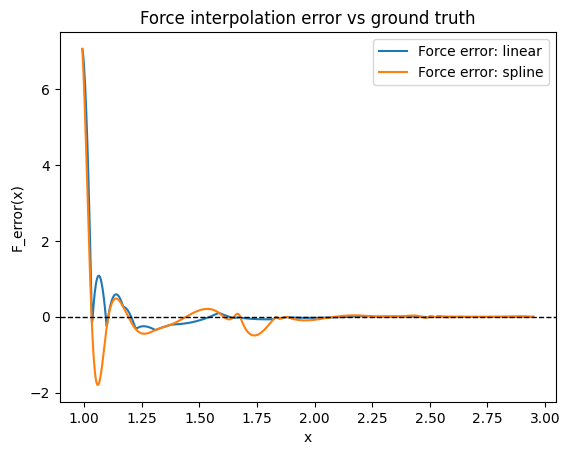

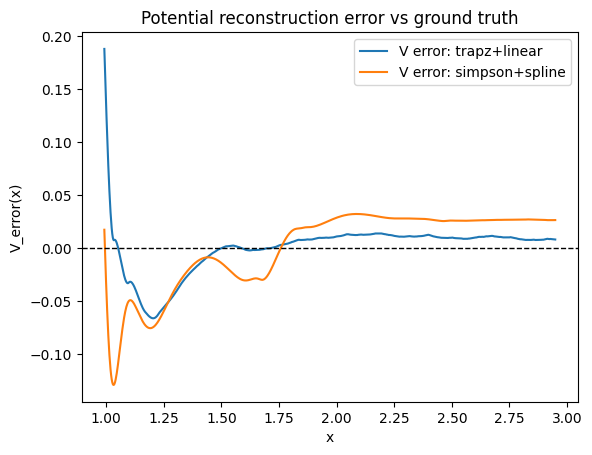

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# -------------------------
# Utility: error norms
# -------------------------
def L2_err(y, ytrue, xgrid):
    return np.sqrt(np.trapz((y - ytrue)**2, xgrid))

def Linf_err(y, ytrue):
    return np.max(np.abs(y - ytrue))

# -------------------------
# Prepare consistent dataset + truth on same domain
# -------------------------
idx = np.argsort(x)
x_sorted = x[idx]
F_sorted = F[idx]

xmin, xmax = x_sorted.min(), x_sorted.max()
x_dense = np.linspace(xmin, xmax, 800)

F_true_dense = lj_force(x_dense)
V_true_dense = lj_potential(x_dense)

# Interpolants
F_lin_fun = lambda z: np.interp(z, x_sorted, F_sorted)
F_spline_fun = CubicSpline(x_sorted, F_sorted, bc_type="natural")

F_lin_dense = F_lin_fun(x_dense)
F_spline_dense = F_spline_fun(x_dense)

# =========================================================
# Error vs ground truth (force + potential) at one N
# =========================================================
N0 = 200
if N0 % 2 == 1:
    N0 += 1

# Reconstruct potentials at x_dense points
x0 = xmin
V_trap = np.array([-trapezoidal_rule(F_lin_fun,   x0, xi, N0) for xi in x_dense])
V_simp = np.array([-simpson_rule(F_spline_fun,    x0, xi, N0) for xi in x_dense])

# Align potentials by constant shift (because V is defined up to constant)
V_trap += np.mean(V_true_dense - V_trap)
V_simp += np.mean(V_true_dense - V_simp)

# Force errors
F_L2_lin   = L2_err(F_lin_dense,   F_true_dense, x_dense)
F_Linf_lin = Linf_err(F_lin_dense, F_true_dense)

F_L2_spl   = L2_err(F_spline_dense,   F_true_dense, x_dense)
F_Linf_spl = Linf_err(F_spline_dense, F_true_dense)

# Potential errors
V_L2_trap   = L2_err(V_trap, V_true_dense, x_dense)
V_Linf_trap = Linf_err(V_trap, V_true_dense)

V_L2_simp   = L2_err(V_simp, V_true_dense, x_dense)
V_Linf_simp = Linf_err(V_simp, V_true_dense)

print("===Errors vs ground truth (on [xmin,xmax]) ===")
print(f"Force  | Linear interp : L2={F_L2_lin:.4e}, Linf={F_Linf_lin:.4e}")
print(f"Force  | Spline interp : L2={F_L2_spl:.4e}, Linf={F_Linf_spl:.4e}")
print(f"V(x)   | Trapz+Linear  : L2={V_L2_trap:.4e}, Linf={V_Linf_trap:.4e}")
print(f"V(x)   | Simpson+Spline: L2={V_L2_simp:.4e}, Linf={V_Linf_simp:.4e}")

# Plot error curves
plt.figure()
plt.plot(x_dense, F_lin_dense - F_true_dense, label="Force error: linear")
plt.plot(x_dense, F_spline_dense - F_true_dense, label="Force error: spline")
plt.axhline(0.0, color="black", linestyle="--", linewidth=1)
plt.xlabel("x"); plt.ylabel("F_error(x)")
plt.title("Force interpolation error vs ground truth")
plt.legend()
plt.show()

plt.figure()
plt.plot(x_dense, V_trap - V_true_dense, label="V error: trapz+linear")
plt.plot(x_dense, V_simp - V_true_dense, label="V error: simpson+spline")
plt.axhline(0.0, color="black", linestyle="--", linewidth=1)
plt.xlabel("x"); plt.ylabel("V_error(x)")
plt.title("Potential reconstruction error vs ground truth")
plt.legend()
plt.show()





/tmp/ipython-input-1408705754.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.sqrt(np.trapz((y - ytrue)**2, xgrid))


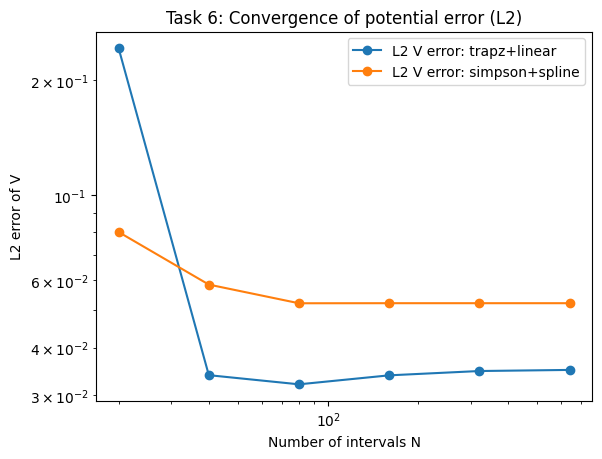

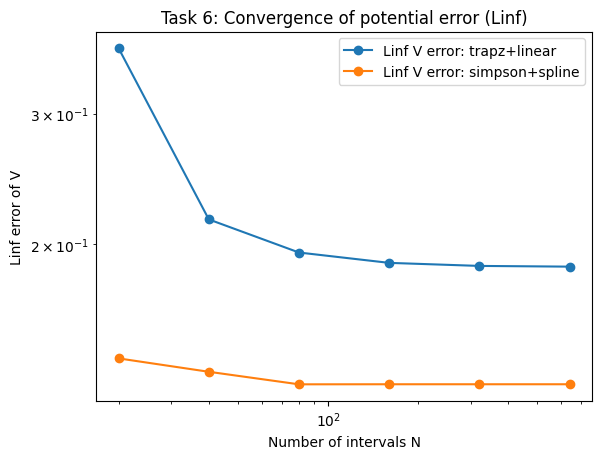


=== Task 6: Errors vs N (Potential) ===
N=  20 | L2(trap)=2.424e-01  L2(simp)=8.018e-02 | Linf(trap)=3.680e-01  Linf(simp)=1.400e-01
N=  40 | L2(trap)=3.387e-02  L2(simp)=5.844e-02 | Linf(trap)=2.159e-01  Linf(simp)=1.343e-01
N=  80 | L2(trap)=3.205e-02  L2(simp)=5.222e-02 | Linf(trap)=1.947e-01  Linf(simp)=1.291e-01
N= 160 | L2(trap)=3.384e-02  L2(simp)=5.224e-02 | Linf(trap)=1.886e-01  Linf(simp)=1.292e-01
N= 320 | L2(trap)=3.473e-02  L2(simp)=5.224e-02 | Linf(trap)=1.868e-01  Linf(simp)=1.292e-01
N= 640 | L2(trap)=3.496e-02  L2(simp)=5.224e-02 | Linf(trap)=1.863e-01  Linf(simp)=1.292e-01


In [ ]:
# =========================================================
# Error vs number of intervals (convergence study)
# =========================================================
Ns = [20, 40, 80, 160, 320, 640]   # you can extend
errs_V_L2_trap = []
errs_V_L2_simp = []
errs_V_Linf_trap = []
errs_V_Linf_simp = []

for N in Ns:
    N_trap = N
    N_simp = N if N % 2 == 0 else N + 1

    V_trapN = np.array([-trapezoidal_rule(F_lin_fun, x0, xi, N_trap) for xi in x_dense])
    V_simpN = np.array([-simpson_rule(F_spline_fun,  x0, xi, N_simp) for xi in x_dense])

    # align constant shift for fair comparison
    V_trapN += np.mean(V_true_dense - V_trapN)
    V_simpN += np.mean(V_true_dense - V_simpN)

    errs_V_L2_trap.append(L2_err(V_trapN, V_true_dense, x_dense))
    errs_V_L2_simp.append(L2_err(V_simpN, V_true_dense, x_dense))

    errs_V_Linf_trap.append(Linf_err(V_trapN, V_true_dense))
    errs_V_Linf_simp.append(Linf_err(V_simpN, V_true_dense))

# Plot convergence (log-log)
plt.figure()
plt.loglog(Ns, errs_V_L2_trap, "o-", label="L2 V error: trapz+linear")
plt.loglog(Ns, errs_V_L2_simp, "o-", label="L2 V error: simpson+spline")
plt.xlabel("Number of intervals N")
plt.ylabel("L2 error of V")
plt.title("Task 6: Convergence of potential error (L2)")
plt.legend()
plt.show()

plt.figure()
plt.loglog(Ns, errs_V_Linf_trap, "o-", label="Linf V error: trapz+linear")
plt.loglog(Ns, errs_V_Linf_simp, "o-", label="Linf V error: simpson+spline")
plt.xlabel("Number of intervals N")
plt.ylabel("Linf error of V")
plt.title("Task 6: Convergence of potential error (Linf)")
plt.legend()
plt.show()

print("\n=== Task 6: Errors vs N (Potential) ===")
for i, N in enumerate(Ns):
    print(f"N={N:4d} | L2(trap)={errs_V_L2_trap[i]:.3e}  L2(simp)={errs_V_L2_simp[i]:.3e} "
          f"| Linf(trap)={errs_V_Linf_trap[i]:.3e}  Linf(simp)={errs_V_Linf_simp[i]:.3e}")
